# SNLP Assignment 4

Name 1: Entang Wang<br/>
Student id 1: 7069521<br/>
Email 1: enwa00001@stud.uni-saarland.de<br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

Name 3: <br/>
Student id 3: <br/>
Email 3: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2_Name3_studentID3.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

# OOVs ( 4 Points)

Out-of-vocabulary words are a problem in language modeling, because of data sparsity.
In this exercise we will axamine the impact of vocab size on OOV rate and how this affects the performance of the model.

1. What are out-of-vocabulary words (OOVs)? (0.25 points)
2. What happened to perplexity with low-frequency words? (0.25 points)

### Answers:

Your answer to 1. and 2. go here.

1. OOVs are any tokens in the test corpus that were not included in the language model’s fixed training vocabulary.
2. Low-frequency words spiked the perplexity of the model.

3. Load and split the data into a train and test set (70:30 ratio). Do not randomize leave the order as is. (0.5point)

In [24]:
import nltk
nltk.download('treebank')

### TODO

def load_and_preprocess_data():
    ''' Function that loads the treebank corpus from nltk and preprocesses it'''
    # Load the raw sentences from the treebank corpus
    sentences = nltk.corpus.treebank.sents()

    # Preprocess: lowercase all tokens
    preprocessed = [token.lower() for sent in sentences for token in sent]
    return preprocessed

def train_test_split(corpus, train_ratio=0.7):
    '''Splits the corpus using a 70:30 ratio. Do not randomize anything here. use the original order
    Input: corpus - preprocessed test
    Output: tuple of train and test set'''
    # Calculate the split index
    split_idx = int(len(corpus) * train_ratio)

    # Split without shuffling
    train_set = corpus[:split_idx]
    test_set = corpus[split_idx:]
    print(train_set[:50])
    print(test_set[:50])
    return train_set, test_set

treebank = load_and_preprocess_data()
train_set, test_set = train_test_split(treebank)

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\WangEntang\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


['pierre', 'vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', '29', '.', 'mr.', 'vinken', 'is', 'chairman', 'of', 'elsevier', 'n.v.', ',', 'the', 'dutch', 'publishing', 'group', '.', 'rudolph', 'agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', ',', 'was', 'named', '*-1', 'a']
['echoed', '*-1', 'by', 'many', 'small', 'investors', 'interviewed', '*', 'by', 'wall', 'street', 'journal', 'reporters', 'across', 'the', 'country', '.', 'but', 'like', 'mr.', 'egnuss', ',', 'few', 'expect', 'it', 'to', 'be', 'halted', '*-1', 'entirely', ',', 'and', 'a', 'surprising', 'number', 'doubt', '0', 'it', 'should', 'be', '*?*', '.', '``', 'i', 'think', '0', 'program', 'trading', 'is', 'basically']


4. Complete the function that selects the top n frequent words to form a vocabulary. (0.5 point)

In [25]:

def make_vocab(tokens, top_n: int) -> set:
    '''Make the top_n frequent vocabulary from a corpus
    Input:tokens - list of tokens
         top_n  - int
    Output: the vocabulary - set of words'''
    
    # Count the frequency of each token
    freq_dict = {}
    for token in tokens:
        freq_dict[token] = freq_dict.get(token, 0) + 1
    
    # Sort the tokens by frequency
    sorted_tokens = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    # Select the top_n tokens
    top_tokens = sorted_tokens[:top_n]
    
    return set(token[0] for token in top_tokens)
        

5. Complete the function that restricts a corpus to the top_n Vocabulary, i.e. replace  all OOVs with a new `<unk>` token. (1 point)

In [8]:

def restrict_vocab(corpus, vocab):
    '''Make the corpus fit inside the vocabulary using <unk>
    Input: corpus - text to be resticted
         vocab  - set of words
    Output: Corpus resticted to vocab'''
    # Traverse the corpus and replace OOVs with <unk>
    for i in range(len(corpus)):
        if corpus[i] not in vocab:
            corpus[i] = "<unk>"
    
    return corpus
    

6. Plot the OOV rate of the test set for varying vocabulary sizes. (1 point)

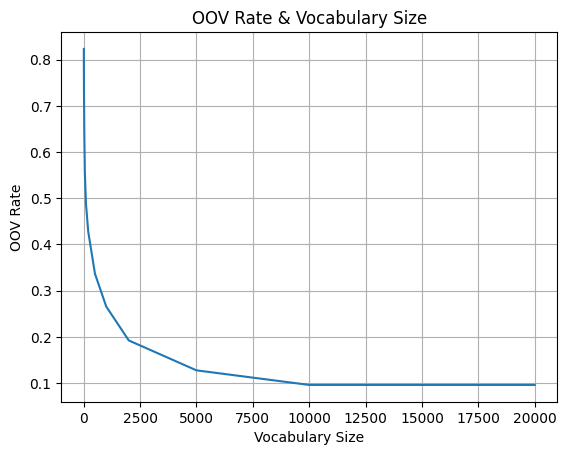

In [33]:
def get_OOV_rate(text, vocab):
    ''' Function that returns the OOV rate for a given corpus and Vocab
    Input: corpus - preprocessed text
         vocab  - set of words
    Output: OOV rate - float '''
    OOV_count = 0
    
    if len(text) == 0:
        return 0.0
    
    for i in range(len(text)):
        if text[i] not in vocab:
            OOV_count += 1

    # Calculate the OOV rate
    OOV_rate = float(OOV_count / len(text))
    
    return OOV_rate

def plot_OOV_rates(corpus, vocab, top_n):
    ''' Function that returns the OOV rate for a given corpus and Vocab
    Input: corpus - preprocessed text
         vocab  - set of words
         top_n - list[int] '''
    
    import matplotlib.pyplot as plt
    
    OOV_rates = []
    
    for i in range(len(top_n)):
        # Get the top_n vocabulary
        new_vocab = make_vocab(vocab, top_n[i])
        
        # Get the OOV rate
        OOV_rate = get_OOV_rate(corpus, new_vocab)
        
        OOV_rates.append(OOV_rate)
    
    # Plot the OOV rates
    plt.plot(top_n, OOV_rates)
    plt.xlabel("Vocabulary Size")
    plt.ylabel("OOV Rate")
    plt.title("OOV Rate & Vocabulary Size")
    plt.grid()
    plt.show()


plot_OOV_rates(test_set, train_set, [5,10,25,50,100,200,500,1000,2000,5000,10000,20000])

7. Why would we restrict Vocabulary size if OOVs are a problem.(0.5 points)

1) save the calculation and memory cost of the model: each word in the vocabulary needs to be stored in the model, and the larger the vocabulary, the more memory is needed.
2) improve the reliability of the model: low-frequency words are often noisy with a low probability that can introduce a lot of variance in the model. By restricting the vocabulary, we can reduce the noise and improve the reliability of the model.
3) improve generalization: by handling unseen words with a special token, we can improve the generalization ability of the model.

# Tokenization (6 Points)

In the previous part we replaced OOVs with a`<unk>` Token. Another approach is to change tokenization to split words in to subwords. In the lecture we learnt about two methods that do this BPE and Morfessor. In this part we will see how they work using text data in English and Hindi. We will also compare them by looking at the entropy of the token distributions and how they handle OOVs.

1. Load the parallel corpus (English-Hindi), preprocess and split the text in words for both languages. Also split into train and test sets using the same ratio as in the previous part.(1 point)

In [12]:
from datasets import load_dataset

# Load the Samanantar dataset for English-Hindi
dataset = load_dataset("ai4bharat/samanantar", "hi", split="train",streaming = True)

# Access the  first 1000 samples of the train split
data = []
for i, sample in enumerate(dataset):
    if i == 1000:
        break
    data.append(sample)

# Print a sample
print(data[0])

{'idx': 0, 'src': "However, Paes, who was partnering Australia's Paul Hanley, could only go as far as the quarterfinals where they lost to Bhupathi and Knowles", 'tgt': 'आस्ट्रेलिया के पाल हेनली के साथ जोड़ी बनाने वाले पेस मियामी में क्वार्टरफाइनल तक ही पहुंच सके क्योंकि इस दौर में उन्हें भूपति और नोल्स ने हराया था।'}


In [ ]:
# preprocess data


2. Train a BPE tokenizer for both languages. (1 point)
3. Compute the entropy and OOV rate of the test set for both languages. What does the entropy tell us? (1 point)

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer

vocab_size = 500

#Train BPE model


#Compute entropys and OOV rates


print(f"BPE entropy english: {bpe_entropy_en:.2f}")
print(f"BPE entropy hindi: {bpe_entropy_hi:.2f}")
print(f"BPE OOV rate english: {bpe_OOV_rate_en:.2f}")
print(f"BPE OOV rate hindi_ {bpe_OOV_rate_hi:.2f}")

4. Train the Morfessor tokenizer on each corpus. Morphesor expects the count followed by the word as a training file.(1 points)

   ```
        22 the
        1 hello
        4 is
        1 test-based
        ...

In [ ]:
import morfessor
# save the words with their counts to morfessor_training_en.txt and morfessor_training_hi.txt


In [ ]:
#train the models
alpha =  0.53

5. Tokenize each test set again using Morfessor. (1 point)

In [ ]:
#tokenize test sets


6. Compare the OOV rate and entropy to BPE. How do they compare for both languages? (1 point)

In [ ]:
#Compute entropys and OOV rates

print(f"Morfessor entropy english: {morfessor_entropy_en:.2f}")
print(f"Morrfessor entropy hindi: {morfessor_entropy_hi:.2f}")
print(f"Morfessor OOV rate english: {morfessor_OOV_rate_en:.2f}")
print(f"Morfessor OOV rate hindi: {morfessor_OOV_rate_hi:.2f}")